## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

combined_data = pd.merge(mouse_metadata, study_results, 
                         how ="left", on = ["Mouse ID", "Mouse ID"])

# Display the data table for preview
combined_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
number_of_mice = len(combined_data["Mouse ID"].unique())
number_of_mice


249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_rows = combined_data[combined_data.duplicated(["Mouse ID", "Timepoint"])]
duplicate_rows

duplicate_rows = combined_data[combined_data.duplicated(keep=False)]
print(duplicate_rows)

# duplicateRows = combined_data[combined_data.duplicated(["Mouse ID", "Timepoint"])]
# print("Duplicate Rows except first occurrence based on all columns are :")
# print(duplicateRows)

duplicate_mice = combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
print(duplicate_mice)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   

     Tumor Volume (mm3)  Metastatic Sites  
908                45.0                 0  
909                45.0                 0  
['g989']


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data = combined_data[combined_data.duplicated(keep =False)]
duplicate_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.0,0
909,g989,Propriva,Female,21,26,0,45.0,0


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

combined_data_cleaned = combined_data.drop_duplicates(keep='first')
# print('Result DataFrame:\n', combined_data_cleaned)
combined_data_cleaned
# combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
total_number_of_mice = len(combined_data_cleaned["Mouse ID"].unique())
total_number_of_mice


249

In [8]:
# combined_data_cleaned.columns
# for conveniance some of the columns are renamed
combined_data_cleaned = combined_data_cleaned.rename(columns = {'Mouse ID': "Mouse_ID", 'Drug Regimen': "Drugs", 
                                                                'Age_months':"Age", 'Weight (g)': "Weight", 'Timepoint':"Time_point",
                                                                'Tumor Volume (mm3)': "Tumer_vol", 'Metastatic Sites': "Site"})

combined_data_cleaned.columns


Index(['Mouse_ID', 'Drugs', 'Sex', 'Age', 'Weight', 'Time_point', 'Tumer_vol',
       'Site'],
      dtype='object')

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# tumor_vol_by_drugs = combined_data_cleaned.groupby("Drugs")["Tumer_vol"].describe()

tumor_vol_mean = combined_data_cleaned.groupby("Drugs")["Tumer_vol"].mean()
tumor_vol_median = combined_data_cleaned.groupby("Drugs")["Tumer_vol"].median()
tumor_vol_variance = combined_data_cleaned.groupby("Drugs")["Tumer_vol"].var()
tumor_vol_std = combined_data_cleaned.groupby("Drugs")["Tumer_vol"].std()
tumor_vol_sem = combined_data_cleaned.groupby("Drugs")["Tumer_vol"].sem()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
drug_vol_stats = pd.DataFrame({
    "Mean": tumor_vol_mean,
    "Median": tumor_vol_median,
    "Variance": tumor_vol_variance,
    "Std": tumor_vol_std,
    "SEM": tumor_vol_sem
})

drug_vol_stats

# tumor_vol_by_drugs

,Mean,Median,Variance,Std,SEM
Drugs,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

drugs_stats_agg = combined_data_cleaned.groupby("Drugs")["Tumer_vol"].aggregate(["mean", "median", "var", "std", "sem"])
drugs_stats_agg

,mean,median,var,std,sem
Drugs,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

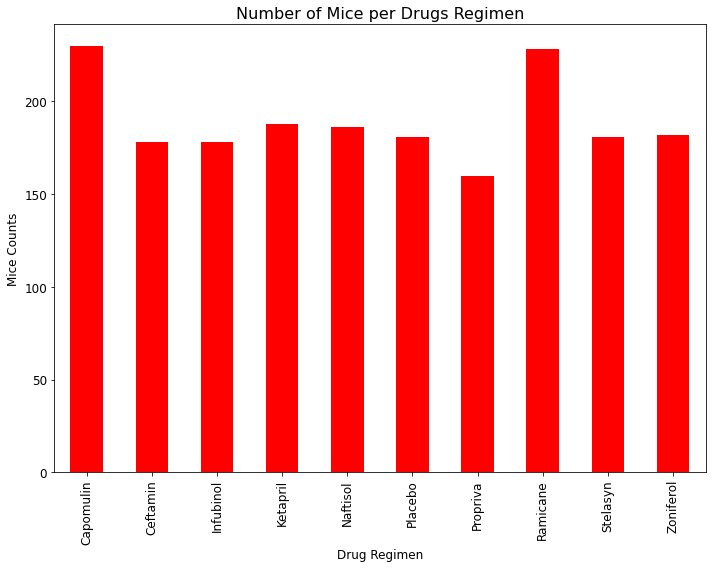

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

mice_counts_drugs = combined_data_cleaned.groupby(["Drugs"]).count()["Mouse_ID"]

mice_counts_drugs

bar_pandas = mice_counts_drugs.plot.bar(figsize=(10,8), color='red',fontsize = 12)

plt.xlabel("Drug Regimen",fontsize = 12)
plt.ylabel("Mice Counts",fontsize = 12)
plt.title("Number of Mice per Drugs Regimen",fontsize = 16)

# plt.savefig("../Images/Pan_mice_per_treat.png", bbox_inches = "tight")

plt.tight_layout()
plt.show()




NameError: name 'mice_list' is not defined

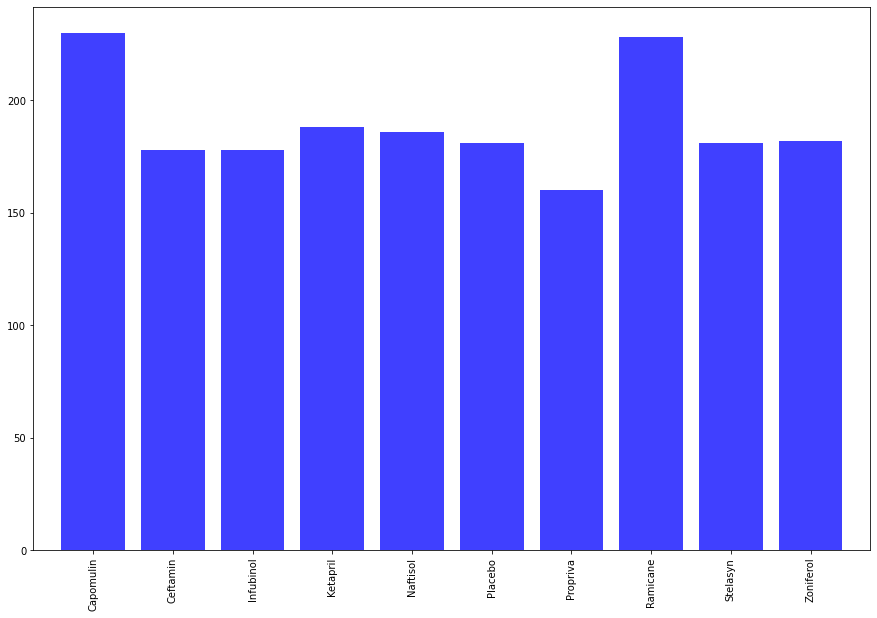

In [12]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

mice_counts_drugs_list =list(combined_data_cleaned.groupby(["Drugs"])["Mouse_ID"].count())
# mice_counts_drugs_list

x_axis = np.arange(len(mice_counts_drugs))
fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.bar(x_axis, mice_counts_drugs_list, color='blue', alpha=0.75, align='center')

tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')

plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, max(mice_list)+10)

plt.title("Number of Mice per Drugs Regimen",fontsize = 16)
plt.xlabel("Drugs",fontsize = 14)
plt.ylabel("Number of Mice",fontsize = 14)

# plt.savefig("../Images/mat_mice_per_treat.png", bbox_inches = "tight")


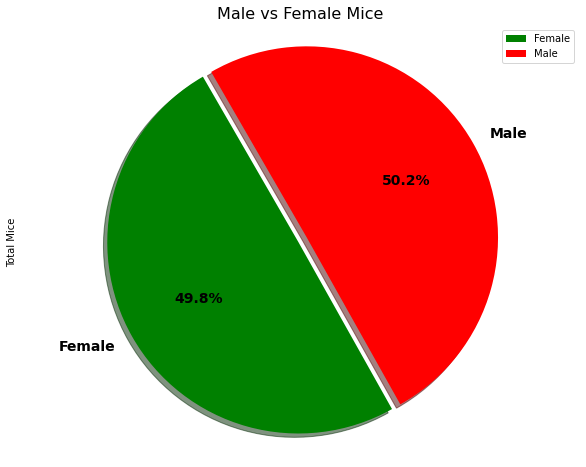

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

mice_gender = combined_data_cleaned.groupby(["Mouse_ID","Sex"])
mice_gender = pd.DataFrame(mice_gender.size())

# mice_gender

# Create the dataframe with total mice count by gender
mouse_gender = pd.DataFrame(mice_gender.groupby(["Sex"]).count())
mouse_gender.columns = ["Total Mice"]

# create and format the percentage of female vs male
# mouse_gender["Percent gender"] = (100*(mouse_gender["Total Mice"]/mouse_gender["Total Mice"].sum()))

# format the "Percentage of Sex" column
# mouse_gender["Percent gender"] = mouse_gender["Percent gender"]

# gender_df
mouse_gender

colors = ['green', 'red']
explode = (0.05, 0)
plot = mouse_gender.plot.pie(y="Total Mice",figsize=(10,8), colors = colors, 
                     startangle=120, explode = explode, shadow = True, autopct="%1.1f%%", 
                             textprops={"fontsize": 14, "weight": "bold"})

plt.title('Male vs Female Mice', fontsize = 16)
plt.axis("equal")

# plt.savefig("../Images/pi_pandas.png", bbox_inches = "tight")
plt.show()


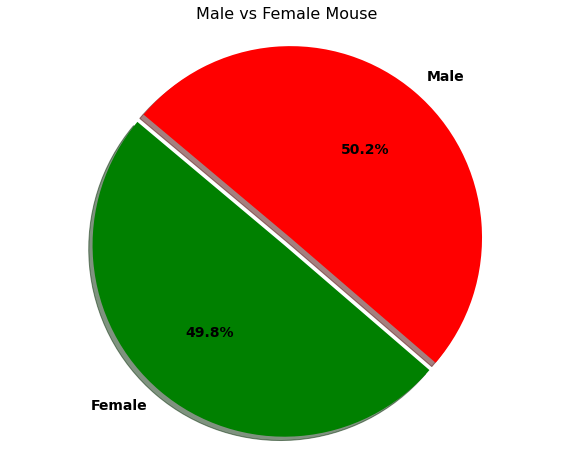

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ["Female","Male"]

#List the values of each section of the pie chart
sizes = [49.799197,50.200803]

#Set colors for each section of the pie
colors = ['green', 'red']

#Determoine which section of the circle to detach
explode = (0.05, 0)

#Create the pie chart based upon the values 
fig1, ax1 = plt.subplots(figsize=(10, 8))
plt.pie(sizes, explode=explode,labels=labels, colors=colors, autopct="%1.1f%%", 
        shadow=True, startangle=140, textprops={"fontsize": 14, "weight":"bold"})
plt.title('Male vs Female Mouse',fontsize = 16)
# plt.ylabel('Sex',fontsize = 14)

plt.axis("equal")

# plt.savefig("../Images/pi_plot.png", bbox_inches = "tight")
plt.show()


## Quartiles, Outliers and Boxplots

In [30]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

campomulin_df = combined_data_cleaned.loc[combined_data_cleaned["Drugs"] == "Capomulin", :]
ramicane_df = combined_data_cleaned.loc[combined_data_cleaned["Drugs"] == "Ramicane", :]
infubinol_df = combined_data_cleaned.loc[combined_data_cleaned["Drugs"] == "Infubinol", :]
ceftamin_df = combined_data_cleaned.loc[combined_data_cleaned["Drugs"] == "Ceftamin", :]




In [31]:
# Start by getting the last (greatest) timepoint for each mouse
capomulin_last = Campomulin_df.groupby('Mouse_ID').max()['Time_point']
capomulin_vol = pd.DataFrame(capomulin_last)
# capomulin_vol

In [32]:
ramicane_last = Campomulin_df.groupby('Mouse_ID').max()['Time_point']
ramicane_vol = pd.DataFrame(Ramicane_last)
# Ramicane_vol

In [33]:
infubinol_last = Infubinol_df.groupby('Mouse_ID').max()['Time_point']
infubinol_vol = pd.DataFrame(Infubinol_last)
# Infubinol_vol

In [41]:
ceftamin_last = Ceftamin_df.groupby('Mouse_ID').max()['Time_point']
ceftamin_vol = pd.DataFrame(Ceftamin_last)
# Ceftamin_vol

In [39]:
capomulin_final = pd.merge(capomulin_vol, combined_data_cleaned, on= ("Mouse_ID", "Time_point"), how = "left")
capomulin_final.head()

ramicane_final = pd.merge(Ramicane_vol, combined_data_cleaned, on= ("Mouse_ID", "Time_point"), how = "left")
# Ramicane_final.head()

infubinol_final = pd.merge(Infubinol_vol, combined_data_cleaned, on= ("Mouse_ID", "Time_point"), how = "left")
# Infubinol_final.head()

ceftamin_final = pd.merge(ceftamin_vol, combined_data_cleaned, on= ("Mouse_ID", "Time_point"), how = "left")
# ceftamin_final
capomulin_final.head()

,Mouse_ID,Time_point,Drugs,Sex,Age,Weight,Tumer_vol,Site
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [ ]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
